Name:         Francis Isimhanze
StudentID:    @00713778
Course:       Big Data Tools and Techniques

In [0]:
# Define the file to work with
filename = 'clinicaltrial_'
years = '2023'
filename = filename +years
filepath = 'pharma'
print(filename)

clinicaltrial_2023


In [0]:
# Assumption: This work is centered on the files made available for this assessment work
# Thses codes works for the said files
if filename == 'clinicaltrial_2023':
    rowNo = 14
    delimiter = '\t'
    split_str = '\\|'
    spliter = '-'
elif filename == 'clinicaltrial_2021' or filename == 'clinicaltrial_2020':
    rowNo = 9
    delimiter = '|'
    split_str = ','
    spliter = ' '
else:
    print('Enter The Correct Number of Attributes or Fields in Your Dataset')

In [0]:
# Read the CSV file into an RDD
rdd = sc.textFile('/FileStore/tables/' + filename + '.csv')
header = rdd.first() # Extract the header
rdd = rdd.filter(lambda row: row != header)


In [0]:
print(header)

"Id	Study Title	Acronym	Status	Conditions	Interventions	Sponsor	Collaborators	Enrollment	Funder Type	Type	Study Design	Start	Completion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [0]:
# Data cleaning process starts here
cleaned_data = rdd.map(lambda line: line.replace(',', '').replace('"', '').\
    split(delimiter)) # Remove commas and quotation marks, and split by '\t'
# header = cleaned_data.first() # Extract the header
cleaned_data = cleaned_data.filter(lambda row: row != header)
cleaned_data.take(2) # Display the first 2 rows of the  cleaned data in the new RDD (cleaned_data)


[['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cognition',
  'OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB',
  'McMaster University',
  "Alzheimer's Society of Brant Haldimand Norfolk Hamilton Halton",
  '30.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RA

In [0]:
def fix_row_length(row, length):
    return row + ([None] * (length - len(row)))
 
# Adjust each row to have 14 fields
cleaned_data_rdd = cleaned_data.map(lambda row: fix_row_length(row, rowNo))


In [0]:
header = cleaned_data_rdd.first()
from pyspark.sql.types import *

# Define the schemas
schema = StructType([
    StructField("Id", StringType(), True),
    StructField("Study Title", StringType(), True),
    StructField("Acronym", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Collaborators", StringType(), True),
    StructField("Enrollment", StringType(), True),  # Changed to StringType
    StructField("Funder Type", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Study Design", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True)
])

schema1 = StructType([
    StructField("Id", StringType(), True),
    StructField("Sponsor", StringType(), True),
    StructField("Status", StringType(), True),
    StructField("Start", StringType(), True),
    StructField("Completion", StringType(), True),
    StructField("Type", StringType(), True),
    StructField("Submission", StringType(), True),
    StructField("Conditions", StringType(), True),
    StructField("Interventions", StringType(), True)
])

# Choose schema based on the length of the header
selected_schema = schema if len(header) == 14 else schema1

# Create DataFrame
clinicaltrial_df = spark.createDataFrame(cleaned_data_rdd, selected_schema)

# Show the DataFrame
clinicaltrial_df.limit(10).display()
# Save DataFrame to a CSV file
# clinicaltrial_df.write.csv("/FileStore/tables/" + filename + "df" + ".csv", mode="overwrite")



Id,Study Title,Acronym,Status,Conditions,Interventions,Sponsor,Collaborators,Enrollment,Funder Type,Type,Study Design,Start,Completion
Id,Study Title,Acronym,Status,Conditions,Interventions,Sponsor,Collaborators,Enrollment,Funder Type,Type,Study Design,Start,Completion
NCT05992571,Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity,,RECRUITING,Cerebrovascular Function|Cognition,OTHER: Placebo|DIETARY_SUPPLEMENT: β-OHB,McMaster University,Alzheimer's Society of Brant Haldimand Norfolk Hamilton Halton,30.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: TRIPLE (PARTICIPANT INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: BASIC_SCIENCE,2023-10-25,2024-08
NCT00237471,Impact of Tight Glycaemic Control in Acute Myocardial Infarction,,TERMINATED,Myocardial Infarct|Hyperglycemia,DRUG: Insulin (tight blood glucose control),Melbourne Health,National Health and Medical Research Council Australia|Bristol-Myers Squibb,40.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT,2005-10,2006-05
NCT03820271,New Prognostic Predictive Models of Mortality of Decompensated Cirrhotic Patients Waiting for Liver Transplantation,SUPERMELD,RECRUITING,Decompensated Cirrhosis|Liver Transplantation,OTHER: SuperMELD,Assistance Publique - Hôpitaux de Paris,,500.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: OTHER,2020-10-01,2023-10-01
NCT06229171,InTake Care: Development and Validation of an Innovative Personalized Digital Health Solution for Medication Adherence Support in Cardiovascular Prevention,InTakeCare,NOT_YET_RECRUITING,Hypertension|Treatment Adherence and Compliance|Digital Health,OTHER: adherence support system based on a vocal assistant,Istituto Auxologico Italiano,Istituti Clinici Scientifici Maugeri SpA|Politecnico di Milano,206.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: OTHER,2024-10-01,2026-04-01
NCT02945371,Tailored Inhibitory Control Training to Reverse EA-linked Deficits in Mid-life,REV,COMPLETED,Smoking|Alcohol Drinking|Prescription Drug Abuse|Substance-Related Disorders|Oral Intake Reduced,BEHAVIORAL: Person-centered inhibitory control training|BEHAVIORAL: Active behavioral response training,University of Oregon,,103.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (PARTICIPANT)|Primary Purpose: PREVENTION,2014-09,2016-05
NCT01055171,Neuromodulation of Trauma Memories in PTSD & Alcohol Dependence,,COMPLETED,Alcohol Dependence|PTSD,DRUG: Propranolol|DRUG: Placebo,Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoholism (NIAAA),44.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT CARE_PROVIDER INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT,2010-01,2012-08
NCT01125371,Computerized Brief Alcohol Intervention (BI) for Binge Drinking HIV At-Risk and Infected Women,,COMPLETED,Alcohol; Harmful Use|Binge Drinking|Risk Behavior|HIV Infection,BEHAVIORAL: Computerized brief alcohol intervention + IVR booster calls|BEHAVIORAL: Computerized brief alcohol intervention|BEHAVIORAL: Attention Control,Johns Hopkins University,National Institute on Alcohol Abuse and Alcoholism (NIAAA),439.0,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT,2011-10,2016-06-07
NCT02554071,Manitoba Pharmacist Initiated Smoking Cessation Pilot Project,,COMPLETED,Smoking Cessation,OTHER: Pharmacist - Smoking Cessation Support,University of Manitoba,Govenment of Manitoba|Canadian Foundation for Pharmacy|Neighbourhood Pharmacy Association of Canada,119.0,OTHER,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: SUPPORTIVE_CARE,2014-01,2014-11
NCT01772771,Molecular Testin

In [0]:
# Confirm the schema
clinicaltrial_df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- Study Title: string (nullable = true)
 |-- Acronym: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Collaborators: string (nullable = true)
 |-- Enrollment: string (nullable = true)
 |-- Funder Type: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Study Design: string (nullable = true)
 |-- Start: string (nullable = true)
 |-- Completion: string (nullable = true)



Prepare the pharma file

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType

# Initialise SparkSession
# spark = SparkSession.builder \
#     .appName('Read CSV and Extract Parent Company Column') \
#     .getOrCreate()

# Define the schema for the DataFrame
Company_schema = StructType([
    StructField('Company', StringType(), True),
    StructField('Parent_Company', StringType(), True)
])

# Read the unzipped pharma CSV file into a DataFrame
pharma_df = spark.read.csv('/FileStore/tables/' + filepath + '.csv', header=True, schema=Company_schema)

# Select the 'Parent_Company' column
pharma_df_company = pharma_df.select('Company','Parent_Company')

# Show the DataFrame
pharma_df_company.limit(5).display()


Company,Parent_Company
Abbott Laboratories,Abbott Laboratories
Abbott Laboratories Inc.,AbbVie
Abbott Laboratories Inc.,AbbVie
"Abbott Laboratories Puerto Rico, Inc.",Abbott Laboratories
Acclarent Inc.,Johnson & Johnson


##### 1. The number of studies in the dataset. You must ensure that you explicitly check distinct studies.

In [0]:
# Question 1 DataFrame Implementation
from pyspark.sql.functions import countDistinct

# Calculate the number of distinct studies using DataFrame API
num_studies = clinicaltrial_df.select(countDistinct('Id').alias('num_studies')).collect()[0]['num_studies']

# Display the result
print(f"The number of distinct studies in the dataset is: {num_studies}")

The number of distinct studies in the dataset is: 483422


##### 2. You should list all the types (as contained in the Type column) of studies in the dataset along with the frequencies of each type. These should be ordered from most frequent to least frequent.

In [0]:
from pyspark.sql.functions import col
header = clinicaltrial_df.columns # Extract header from the DataFrame
column_names_to_use = header # Use the extracted header to determine column names
cleaned_data_filtered_df = clinicaltrial_df.filter(~col("Type").isNull())# Filter out rows with missing data based on the selected column names
study_types_filtered_df = cleaned_data_filtered_df.filter(clinicaltrial_df["Type"] != "Type")# Filter out rows where study type matches column name "Type"
study_types_filtered_df = study_types_filtered_df.filter(clinicaltrial_df["Type"] != "")
study_type_counts_df = study_types_filtered_df.groupBy("Type").count() # Count the frequency of each study type
sorted_study_types_df = study_type_counts_df.orderBy(col("count").desc()).collect() # Sort the types by frequency in descending order
max_length = max(len(row["Type"]) for row in sorted_study_types_df) # Determine the length of the longest string in type
print("Type" + " " * (max_length - len("Type")) + "\t\tCount") # Display the result with aligned columns
print('-' * (max_length + 15))
for row in sorted_study_types_df:
    print(f"{row['Type']}{' ' * (max_length - len(row['Type']))}\t\t{row['count']}")
print('-' * (max_length + 15))


Type           		Count
------------------------------
INTERVENTIONAL 		371381
OBSERVATIONAL  		110221
EXPANDED_ACCESS		928
------------------------------


##### 3. The top 5 conditions (from Conditions) with their frequencies.

In [0]:
# Question 3 DataFrame Implementation
from pyspark.sql.functions import col, explode, split
split_conditions_df = clinicaltrial_df.withColumn("Condition", explode(split(col("Conditions"), split_str)))
filtered_conditions_df = split_conditions_df.filter(col("Condition") != "") # Filter out any empty conditions
condition_counts_df = filtered_conditions_df.groupBy("Condition").count() # Count the frequency of each condition
sorted_condition_counts_df = condition_counts_df.orderBy(col("count").desc()) # Sort the conditions by frequency in descending order
top_5_conditions_df = sorted_condition_counts_df.limit(5) # Take the top 5 conditions
top_5_conditions_df.show(truncate=False) # Show the result


+-------------+-----+
|Condition    |count|
+-------------+-----+
|Healthy      |9731 |
|Breast Cancer|7502 |
|Obesity      |6549 |
|Stroke       |4073 |
|Hypertension |4024 |
+-------------+-----+



##### 4. Find the 10 most common sponsors that are not pharmaceutical companies, along with the number of clinical trials they have sponsored. Hint: For a basic implementation, you can assume that

In [0]:
from pyspark.sql.functions import col

# Define column names
column_names = ["Id", "Study Title", "Acronym", "Status", "Conditions", "Interventions", "Sponsor", "Collaborators", "Enrollment", "Funder Type", "Type", "Study Design", "Start", "Completion"]
column_names1 = ["Id", "Sponsor", "Status", "Start", "Completion", "Type", "Submission", "Conditions", "Interventions"]
pharma_df_column_names = ["Company", "Parent_Company"]

# Determine the sponsor column name based on the header length of clinicaltrial_df
if len(clinicaltrial_df.columns) == len(column_names):
    sponsor_column_name = "Sponsor"
elif len(clinicaltrial_df.columns) == len(column_names1):
    sponsor_column_name = "Sponsor" 
else:
    raise ValueError("Unsupported clinicaltrial_df header length")
pharma_companies = pharma_df.select("Parent_Company").rdd.flatMap(lambda x: x).collect() # Extract the list of pharmaceutical companies from pharma_df
non_pharma_sponsors_df = clinicaltrial_df.filter(~col(sponsor_column_name).isin(pharma_companies)) # Filter out pharmaceutical sponsors from clinicaltrial_df

sponsor_trials_count_df = non_pharma_sponsors_df.groupBy(sponsor_column_name).count()# Count the number of trials sponsored by each non-pharmaceutical sponsor

# Select the top 10 non-pharmaceutical sponsors based on the number of trials sponsored
top_non_pharma_sponsors_df = sponsor_trials_count_df.orderBy(col("count").desc()).limit(10)
from pyspark.sql.functions import col, format_string

# Determine the width of the sponsor column
max_sponsor_length = top_non_pharma_sponsors_df.selectExpr(f"length({sponsor_column_name}) as sponsor_length").agg({"sponsor_length": "max"}).collect()[0][0]

# Print the results with aligned columns
top_non_pharma_sponsors_df.withColumn("Sponsor", format_string("%-{0}s".format(max_sponsor_length), col("Sponsor"))).show(truncate=False)



+-------------------------------------------------------------+-----+
|Sponsor                                                      |count|
+-------------------------------------------------------------+-----+
|National Cancer Institute (NCI)                              |3410 |
|Assiut University                                            |3335 |
|Cairo University                                             |3023 |
|Assistance Publique - Hôpitaux de Paris                      |2951 |
|Mayo Clinic                                                  |2766 |
|M.D. Anderson Cancer Center                                  |2702 |
|Novartis Pharmaceuticals                                     |2393 |
|National Institute of Allergy and Infectious Diseases (NIAID)|2340 |
|Massachusetts General Hospital                               |2263 |
|National Taiwan University Hospital                          |2181 |
+-------------------------------------------------------------+-----+



##### 5. Plot number of completed studies for each month in 2023. You need to include your visualization as well as a table of all the values you have plotted for each month.

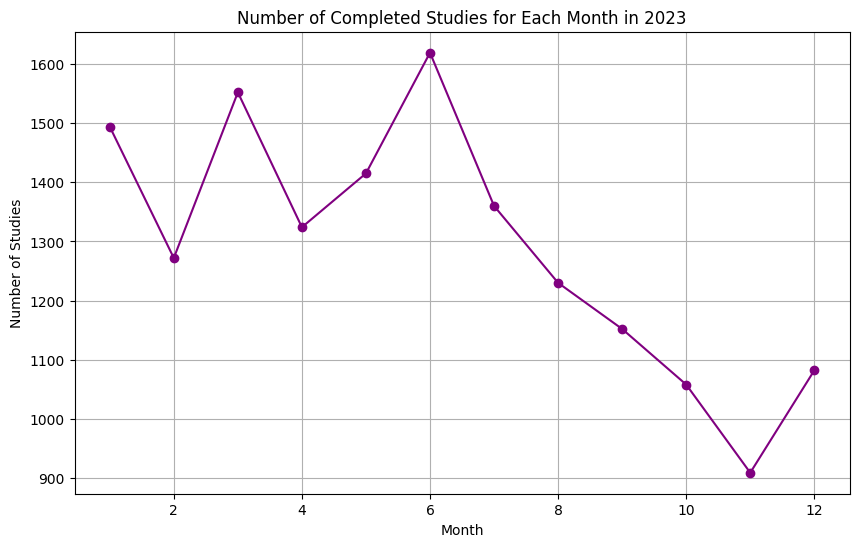

+-----+-----+
|Month|count|
+-----+-----+
|    1| 1494|
|    2| 1272|
|    3| 1552|
|    4| 1324|
|    5| 1415|
|    6| 1619|
|    7| 1360|
|    8| 1230|
|    9| 1152|
|   10| 1058|
|   11|  909|
|   12| 1082|
+-----+-----+



In [0]:
from pyspark.sql.functions import col, month, year
import matplotlib.pyplot as plt
completed_studies_2023_df = clinicaltrial_df.filter((col("Status") == "COMPLETED") & 
                                                    (year(col("Completion")) == int(years))) # Filter completed studies in 2023

# Extract month from Completion date
monthly_counts_df = (
    completed_studies_2023_df
    .withColumn("Month", month(col("Completion")))
    .groupBy("Month")
    .count()
    .orderBy("Month")
)
# Collect data for plotting
months = monthly_counts_df.select("Month").rdd.flatMap(lambda x: x).collect()
counts = monthly_counts_df.select("count").rdd.flatMap(lambda x: x).collect()
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(months, counts, marker='o', color='purple', linestyle='-')
plt.title(f'Number of Completed Studies for Each Month in {years}')
plt.xlabel('Month')
plt.ylabel('Number of Studies')
plt.grid(True)
plt.show()
# Displaying table
monthly_counts_df.show()


### Further Analysis of the Clinical Trial Dataset

##### Question: What are the top 5 sponsors by the number of studies they have sponsored?

In [0]:
# Dataframe Implementation
from pyspark.sql.functions import desc

# Group by sponsor and count occurrences
top_sponsors = clinicaltrial_df.groupBy("Sponsor").count() \
    .orderBy(desc("count")).limit(5)

# Display the result
top_sponsors.show(truncate = False)


+-------------------------------+-----+
|Sponsor                        |count|
+-------------------------------+-----+
|GlaxoSmithKline                |3482 |
|National Cancer Institute (NCI)|3410 |
|Assiut University              |3335 |
|Pfizer                         |3045 |
|AstraZeneca                    |3024 |
+-------------------------------+-----+



##### The codes are working up to this point. Work on other parts (sql and DataFrame)